In [33]:
local_path = './'

"""## Prepare fastai"""
from fastai import *
from fastai.text import *
from fastai.metrics import *
torch.cuda.set_device(0)

"""## Prepare Dataset"""
local_project_path = local_path + 'bp_deepred/'
if not os.path.exists(local_project_path):
    os.makedirs(local_project_path)
print('local_project_path:', local_project_path)

"""## Create Language Model"""
class dna_tokenizer(BaseTokenizer):
    def tokenizer(slef, t):
        return list(t)
tokenizer = Tokenizer(tok_func=dna_tokenizer, pre_rules=[], post_rules=[], special_cases=[])
processor = [TokenizeProcessor(tokenizer=tokenizer, include_bos= True, include_eos=True), NumericalizeProcessor(max_vocab=30000)]

local_project_path: ./bp_deepred/


In [34]:
# batch size
bs = 512
data_lm = TextLMDataBunch.from_csv(local_project_path, 'combined.csv',
                                   text_cols ='seq', valid_pct= 0.1, tokenizer=tokenizer,
                                   include_bos= True, include_eos=True, bs=bs)
print('data_cls Training set size', len(data_lm.train_ds))
print('data_cls Validation set size', len(data_lm.valid_ds))

data_cls Training set size 129303
data_cls Validation set size 14368


In [35]:
data_lm.show_batch()

idx,text
0,V W L R L L E R A L P G R A P R T V L A K V L C D Q T V G G P I A L S A F Y V G M S V L Q G K D D I F L D L K Q K F W N T Y K S G L M Y W P
1,R E R I E R V I Q E T R L K Q I Y T A E E K Y V V K T S F Y S N K V I S S N T S L K V A Q F L T V T V D L E Q R R H L E E Q L K E I H R K L
2,Y H S T G S L N G Y G C G D N V V Q A V E Q Y A K K V V D D T L E L T L G S T V F R V S E T T K S A D R V T Y A E K L S P L T G Q A C R Y C
3,H K H Q N G F P Q F L T G T A Q N V P E S L D K L H V T P S T R P Q H V R I K N W G N G E I F H D T L H H K A T S D I S C K S K L C M G S I
4,P R G N K S Y Y E G I D I Y D A Q P P I R P L P Q Q Q T S L M T V A N Q L P G S L D N L H I N N L N M R R R K L P T A P L M G S S C Q L H L


In [37]:
data_lm.vocab.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'L',
 'S',
 'A',
 'E',
 'G',
 'V',
 'K',
 'P',
 'T',
 'R',
 'D',
 'I',
 'Q',
 'N',
 'F',
 'Y',
 'H',
 'M',
 'C',
 'W',
 'x',
 'o',
 's',
 ' ',
 'b',
 'e',
 'X',
 'U',
 'B',
 'O',
 'Z']

In [38]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=False).to_fp16()

In [ ]:
learn_lm.data = data_lm

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


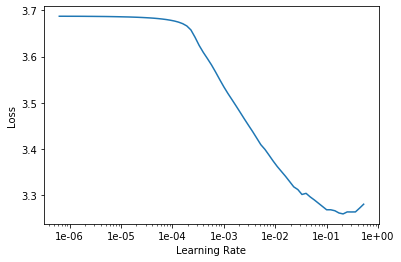

In [39]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end = 15)

In [ ]:
learn_lm.fit_one_cycle(1, 1e-2/2.6**1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [20]:
learn_lm.unfreeze()

In [ ]:
lr=0.01
learn_lm.fit_one_cycle(1, slice(lr), moms=(0.8,0.7))

In [ ]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))